In [126]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi']=400
import numpy as np
import random
scale=0.2
x1=np.random.normal(loc=[-1,-1],scale=scale,size=[500,2])
x2=np.random.normal(loc=[0,1],scale=scale,size=[500,2])
x3=np.random.normal(loc=[1,-1],scale=scale,size=[500,2])

In [128]:
x_train_lda=[]
y_train=[]
for i in range(500):
    rand=random.random()
    new_sample=np.random.choice(500)
    if(rand<0.333):
        x_train_lda.append(x1[new_sample]+random.random()*0.25-0.125)
        y_train.append(1)
    elif(rand<0.666):
        x_train_lda.append(x2[new_sample]+random.random()*0.25-0.125)
        y_train.append(2)
    else:
        x_train_lda.append(x3[new_sample]+random.random()*0.25-0.125)
        y_train.append(3)
x_train_lda=np.array(x_train_lda)
y_train=np.array(y_train)

In [129]:
def mean_vector(category):
    x_mean=[]
    y_mean=[]
    for i in range(len(x_train_lda)):
        if(y_train[i] == category):
            x_mean.append(x_train_lda[i][0])
            y_mean.append(x_train_lda[i][1])
    return(np.matrix([[np.mean(x_mean)],[np.mean(y_mean)]]))

def scatter_matrix(category):
    result=np.matrix([[0,0],[0,0]])
    m=mean_vector(category)
    for i in range(len(x_train_lda)):
        if(y_train[i] == category):
            x_j=np.matrix([[x_train_lda[i][0]],[x_train_lda[i][1]]])
            result=result+(x_j-m)*(x_j-m).T
    return result

def pooled(cate1,cate2):
    return scatter_matrix(cate1)+scatter_matrix(cate2)
    
def between(cate1,cate2):
    return (mean_vector(cate1)-mean_vector(cate2))*(mean_vector(cate1)-mean_vector(cate2)).T

def omega(cate1,cate2):
    swinverse=np.linalg.inv(pooled(cate1,cate2))
    return swinverse*(mean_vector(cate1)-mean_vector(cate2))

def omega_0(cate1,cate2):
    m1=mean_vector(cate1)
    m2=mean_vector(cate2)
    swinverse=np.linalg.inv(pooled(cate1,cate2))
    return -0.5*(m1+m2).T*swinverse*(m1-m2)

In [130]:
def classify(cate1,cate2,x):
    gx=omega(cate1,cate2).T*x+omega_0(cate1,cate2)
    if(gx>0):
        return cate1
    else:
        return cate2

def classify_3(x):
    outcome=[]
    for i in range(len(x)):
        x_j=np.matrix([[x[i][0]],[x[i][1]]])
        result=[]
        result.append(classify(1,2,x_j))
        result.append(classify(2,3,x_j))
        result.append(classify(1,3,x_j))
        result.sort()
        print(result)
        outcome.append(result[1])
        print(i)
    return np.array(outcome)

In [131]:
def plot_regions(x, y, resolution=0.2):
    markers = ['s', 'x', 'o', '^', 'v']
    colors = ['r', 'g', 'b', 'gray', 'cyan']
    cmap = ListedColormap(colors[:len(np.unique(y))])
    #x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    #x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    x1_min, x1_max =-2,2
    x2_min, x2_max =-2,2
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    z = classify_3(np.array([xx1.ravel(), xx2.ravel()]).T)
    
    z = z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, z, alpha=0.4, cmap=cmap)
 
    for idx, cc in enumerate(np.unique(y)):
        plt.scatter(x=x[y == cc, 0],
                    y=x[y == cc, 1],
                    alpha=0.6,
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx],
                    label=cc)

[1, 1, 3]
0
[1, 1, 3]
1
[1, 1, 3]
2
[1, 1, 3]
3
[1, 1, 3]
4
[1, 1, 3]
5
[1, 1, 3]
6
[1, 1, 3]
7
[1, 1, 3]
8
[1, 1, 3]
9
[1, 3, 3]
10
[1, 3, 3]
11
[1, 3, 3]
12
[1, 3, 3]
13
[1, 3, 3]
14
[1, 3, 3]
15
[1, 3, 3]
16
[1, 3, 3]
17
[1, 3, 3]
18
[1, 3, 3]
19
[1, 1, 3]
20
[1, 1, 3]
21
[1, 1, 3]
22
[1, 1, 3]
23
[1, 1, 3]
24
[1, 1, 3]
25
[1, 1, 3]
26
[1, 1, 3]
27
[1, 1, 3]
28
[1, 1, 3]
29
[1, 3, 3]
30
[1, 3, 3]
31
[1, 3, 3]
32
[1, 3, 3]
33
[1, 3, 3]
34
[1, 3, 3]
35
[1, 3, 3]
36
[1, 3, 3]
37
[1, 3, 3]
38
[1, 3, 3]
39
[1, 1, 3]
40
[1, 1, 3]
41
[1, 1, 3]
42
[1, 1, 3]
43
[1, 1, 3]
44
[1, 1, 3]
45
[1, 1, 3]
46
[1, 1, 3]
47
[1, 1, 3]
48
[1, 1, 3]
49
[1, 3, 3]
50
[1, 3, 3]
51
[1, 3, 3]
52
[1, 3, 3]
53
[1, 3, 3]
54
[1, 3, 3]
55
[1, 3, 3]
56
[1, 3, 3]
57
[1, 3, 3]
58
[1, 3, 3]
59
[1, 1, 3]
60
[1, 1, 3]
61
[1, 1, 3]
62
[1, 1, 3]
63
[1, 1, 3]
64
[1, 1, 3]
65
[1, 1, 3]
66
[1, 1, 3]
67
[1, 1, 3]
68
[1, 1, 3]
69
[1, 3, 3]
70
[1, 3, 3]
71
[1, 3, 3]
72
[1, 3, 3]
73
[1, 3, 3]
74
[1, 3, 3]
75
[1, 3, 3]
76
[1, 3, 3]

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


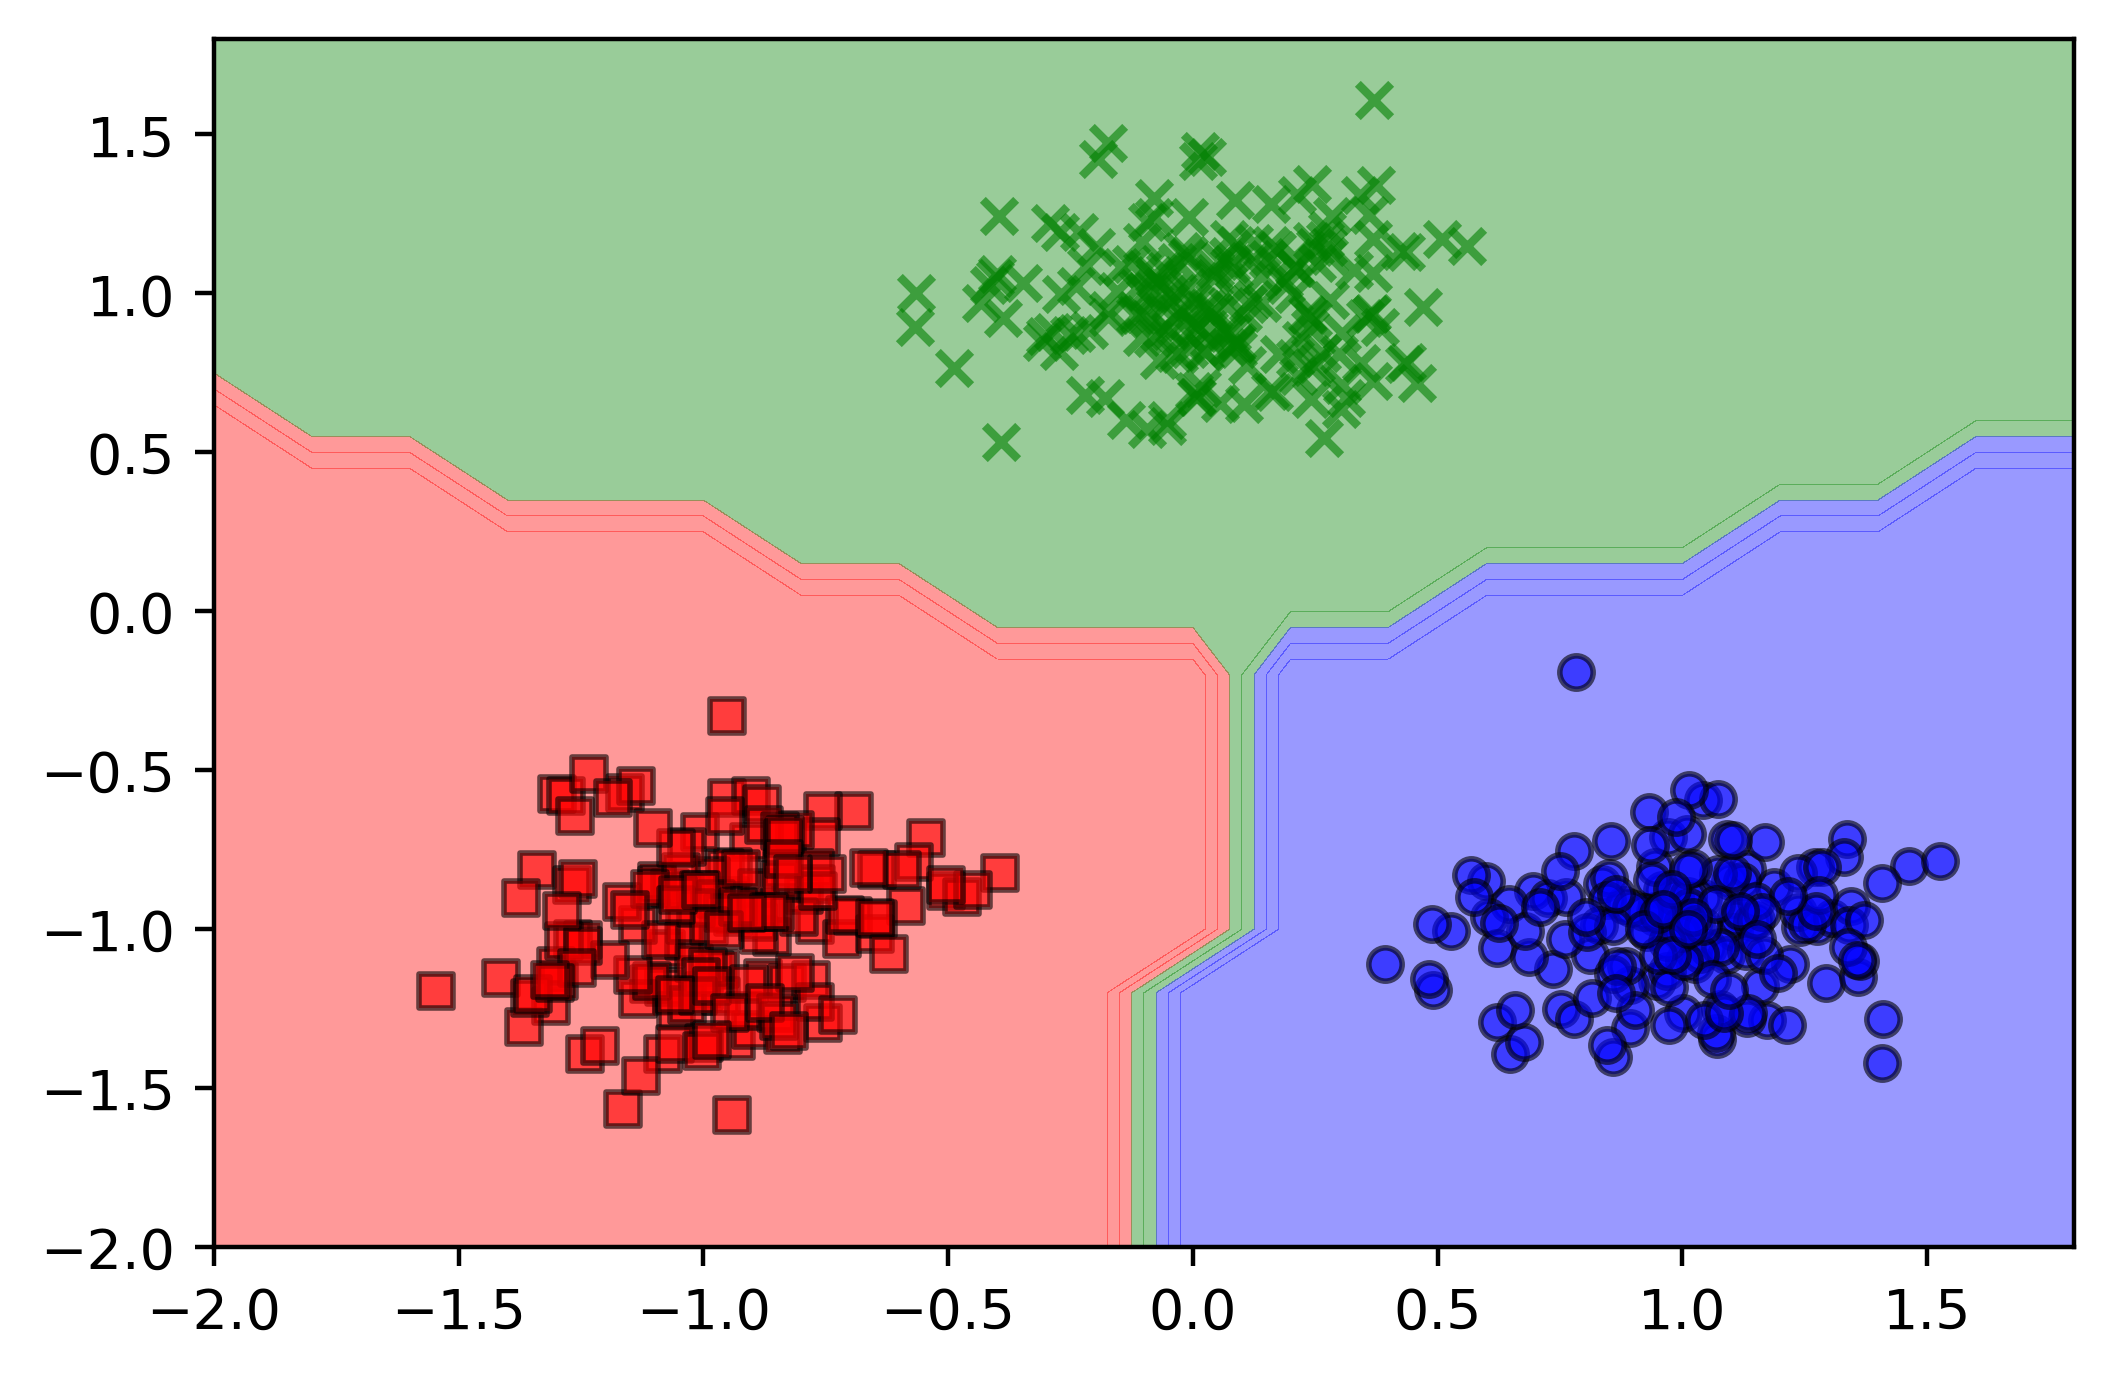

In [132]:
plot_regions(x_train_lda,y_train)

In [133]:
'''for i in range(len(y_train)):
    x_j=np.matrix([[x_train_lda[i][0]],[x_train_lda[i][1]]])
    result=[]
    result.append(classify(1,2,x_j))
    result.append(classify(2,3,x_j))
    result.append(classify(1,3,x_j))
    result.sort()
    if(result[1]==y_train[i]):
        print("True!")
    else:
        print("False")'''

'for i in range(len(y_train)):\n    x_j=np.matrix([[x_train_lda[i][0]],[x_train_lda[i][1]]])\n    result=[]\n    result.append(classify(1,2,x_j))\n    result.append(classify(2,3,x_j))\n    result.append(classify(1,3,x_j))\n    result.sort()\n    if(result[1]==y_train[i]):\n        print("True!")\n    else:\n        print("False")'